# WeatherPy
----


In [1]:
# Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
import scipy.stats as st
import os


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
################### NOTE #########################
#####code provided by professor in this block
##################################################

# List for holding lat_lngs and cities values
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

################### END BLOCK ####################
##################################################

584

In [3]:
#putting the cities from the api into a dataframe

city_df = pd.DataFrame({'City' : cities})
city_df

,City
0,koumac
1,hasaki
2,cape town
3,te anau
4,porto seguro
...,...
579,coruripe
580,aswan
581,burriana
582,innisfail


### API Calls

In [4]:
# API key
from api_keys import weather_api_key

#url
base_url = 'https://api.openweathermap.org/data/2.5/weather?'

In [5]:
city_name_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
cloud_list = []
wind_list = []
country_list = []
date_list = []



#record and set number initilization
record_num = 1
set_num = 1


print('Beginning Data Retrieval')
print('-----------------------------')


for city in cities:
   
    #parameters
    params ={'location': 'en', 
             'units' : 'imperial',
             'q' : city,
             'APPID': weather_api_key}
      
    #try statement to test for each city --> appending city values if found
    try:
        
        # run a request using our params dictionary
        response = requests.get(base_url, params=params)
        data = response.json()     
        
        #appending city values ti
        lng_list.append(data['coord']['lon'])
        lat_list.append(data['coord']['lat'])
        temp_list.append(data['main']['temp'])
        humidity_list.append(data['main']['humidity'])
        cloud_list.append(data['clouds']['all'])
        wind_list.append(data['wind']['speed'])
        city_name_list.append(data['name'])
        date_list.append(data['dt']) 
        country_list.append(data['sys']['country']) 
        
        print(f'Processing Record {record_num} of Set {set_num} | {city}')  
    
    except KeyError:
        print("City not found. Skipping..")
    
    # Setting Api call limt to 50 per set
    if record_num == 50:
            set_num += 1
            record_num = 1
    
    record_num += 1
        
print('End of Data Retrieval')
print('-----------------------------')
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | koumac
Processing Record 2 of Set 1 | hasaki
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | te anau
Processing Record 5 of Set 1 | porto seguro
Processing Record 6 of Set 1 | aklavik
Processing Record 7 of Set 1 | saskylakh
Processing Record 8 of Set 1 | budhlada
Processing Record 9 of Set 1 | provideniya
Processing Record 10 of Set 1 | itarema
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | khatanga
City not found. Skipping..
Processing Record 14 of Set 1 | lumphat
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | luderitz
Processing Record 17 of Set 1 | mangrol
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | kedrovyy
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | hermanus
Processing Record 23 of Set 1 | mahebourg
Processing Record 24 of Set

Processing Record 11 of Set 5 | buala
Processing Record 12 of Set 5 | jaguaruna
Processing Record 13 of Set 5 | omboue
Processing Record 14 of Set 5 | waspan
Processing Record 15 of Set 5 | sakakah
City not found. Skipping..
Processing Record 17 of Set 5 | stillwater
Processing Record 18 of Set 5 | klaksvik
Processing Record 19 of Set 5 | rawson
Processing Record 20 of Set 5 | pevek
Processing Record 21 of Set 5 | gambo
Processing Record 22 of Set 5 | at-bashi
Processing Record 23 of Set 5 | agadez
Processing Record 24 of Set 5 | port alberni
Processing Record 25 of Set 5 | tabou
Processing Record 26 of Set 5 | wolow
Processing Record 27 of Set 5 | general roca
Processing Record 28 of Set 5 | walvis bay
Processing Record 29 of Set 5 | sitka
Processing Record 30 of Set 5 | dudinka
Processing Record 31 of Set 5 | gold coast
City not found. Skipping..
Processing Record 33 of Set 5 | zhucheng
Processing Record 34 of Set 5 | la sarre
City not found. Skipping..
Processing Record 36 of Set 5 

Processing Record 20 of Set 9 | meulaboh
Processing Record 21 of Set 9 | bonavista
Processing Record 22 of Set 9 | pimentel
Processing Record 23 of Set 9 | baleno
Processing Record 24 of Set 9 | tashtagol
Processing Record 25 of Set 9 | kabalo
Processing Record 26 of Set 9 | saint-pierre
Processing Record 27 of Set 9 | rothenbach
Processing Record 28 of Set 9 | port blair
Processing Record 29 of Set 9 | fukue
Processing Record 30 of Set 9 | lagos
Processing Record 31 of Set 9 | roma
Processing Record 32 of Set 9 | saldanha
Processing Record 33 of Set 9 | rundu
Processing Record 34 of Set 9 | coihaique
Processing Record 35 of Set 9 | alugan
City not found. Skipping..
Processing Record 37 of Set 9 | hunterville
City not found. Skipping..
Processing Record 39 of Set 9 | koygorodok
Processing Record 40 of Set 9 | boende
City not found. Skipping..
Processing Record 42 of Set 9 | adet
Processing Record 43 of Set 9 | pictou
Processing Record 44 of Set 9 | matara
Processing Record 45 of Set 9 

### Convert Raw Data to DataFrame


In [6]:
# set up additional columns to hold information
weather_df = pd.DataFrame({'City' : city_name_list,
                           'Lat' : lat_list,
                           'Lng' : lng_list,
                           'Max Temp' : temp_list,
                           'Humidity' : humidity_list,
                           'Cloudiness' : cloud_list,
                           'Wind Speed' : wind_list,
                           'Country' : country_list,
                           'Date' : date_list})

weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Koumac,-20.57,164.28,73.26,80,99,3.96,NC,1603386702
1,Hasaki,35.73,140.83,60.87,100,75,6.93,JP,1603386725
2,Cape Town,-33.93,18.42,63.14,82,0,17.22,ZA,1603387027
3,Te Anau,-45.42,167.72,43.93,83,100,2.37,NZ,1603387257
4,Porto Seguro,-16.45,-39.06,82.40,65,75,12.75,BR,1603387257
...,...,...,...,...,...,...,...,...,...
529,Coruripe,-10.13,-36.18,83.61,64,13,12.08,BR,1603387385
530,Aswān,24.09,32.91,87.03,13,0,9.93,EG,1603387386
531,Burriana,39.89,-0.09,66.00,93,98,5.50,ES,1603387386
532,Innisfail,-17.53,146.03,68.99,89,53,3.04,AU,1603387386


## Exporting to CSV File

In [7]:
# Output File (CSV)
weather_df.to_csv("output_data/weatherpy/cities.csv", index=False, encoding='utf-8')

## Inspect the data and remove the cities where the humidity > 100%.
     Skip this step if there are no cities that have humidity > 100%. 

In [8]:
weather_df.count()

City          534
Lat           534
Lng           534
Max Temp      534
Humidity      534
Cloudiness    534
Wind Speed    534
Country       534
Date          534
dtype: int64

In [9]:
print([weather_df['Humidity'] > 100])

[0      False
1      False
2      False
3      False
4      False
       ...  
529    False
530    False
531    False
532    False
533    False
Name: Humidity, Length: 534, dtype: bool]


--> step skipped since no cities over 100% humidity

In [10]:
weather_df[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date']].describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,5.340000e+02
mean,17.670768,20.346423,62.127734,71.692884,51.758427,8.107921,1.603387e+09
std,34.128300,91.583975,22.180731,21.394079,38.579706,5.730516,1.282604e+02
min,-54.800000,-175.200000,1.670000,9.000000,0.000000,0.180000,1.603386e+09
25%,-9.065000,-59.340000,46.722500,64.000000,12.000000,3.830000,1.603387e+09
50%,20.085000,21.695000,67.900000,78.000000,55.500000,6.930000,1.603387e+09
75%,46.307500,103.432500,78.962500,87.000000,90.000000,10.822500,1.603387e+09
max,78.220000,179.320000,102.510000,100.000000,100.000000,36.840000,1.603387e+09


## Plotting the Data


## Latitude vs. Temperature Plot

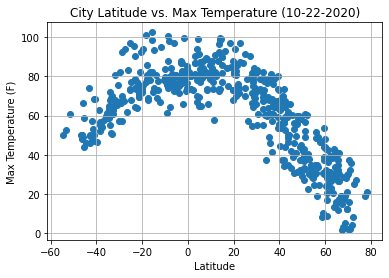

This plot shows that the further you move away from the equator (Lat:0) the colder it gets


In [11]:
#Scatterplot
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], marker = "o")

#labeling
plt.title(f'City Latitude vs. Max Temperature ({time.strftime("%m-%d-%Y")})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

#exporting plot as png
plt.savefig("output_data/weatherpy/ fig 1 - Latitude_V_Temperature.png")

#printing
plt.show()
print('This plot shows that the further you move away from the equator (Lat:0) the colder it gets')

# Using a function to plot remaining plots

In [12]:
#using a function to plot scatter plots

def plotting_data(x_axis, y_axis, x_lab, y_lab, title, savename):
    
    #scatterplot
    plt.scatter(x_axis, y_axis, marker = "o")
    plt.grid(True)

    #labeling
    plt.title(title)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    
    #sizing
    plt.tight_layout
    
    
    #exporting plot as png
    plt.savefig(f"output_data/weatherpy/{savename}.png")
    
    #printing
    plt.show()  
    

## Latitude vs. Humidity Plot

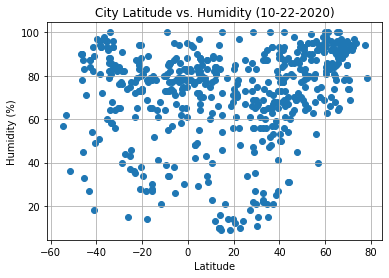

This plot does not show a relationship pattern between latitude and humidity


In [13]:
#labeling
x_lab = 'Latitude'
y_lab = 'Humidity (%)'
title = f'City Latitude vs. Humidity ({time.strftime("%m-%d-%Y")})'

#saving
savename = 'fig 2 - Latitude_V_Humidity'

#function
plotting_data(weather_df['Lat'], weather_df['Humidity'], x_lab, y_lab, title, savename)

print('This plot does not show a relationship pattern between latitude and humidity')

## Latitude vs. Cloudiness Plot

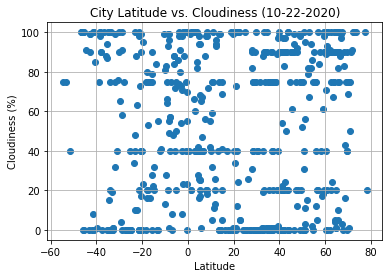

This plot does not show a relationship pattern between latitude and cloudiness


In [14]:
#labeling
x_lab = 'Latitude'
y_lab = 'Cloudiness (%)'
title = f'City Latitude vs. Cloudiness ({time.strftime("%m-%d-%Y")})'

#saving
savename = 'fig 3 - Latitude_V_Cloudiness'

#function
plotting_data(weather_df['Lat'], weather_df['Cloudiness'], x_lab, y_lab, title, savename)

print('This plot does not show a relationship pattern between latitude and cloudiness')

## Latitude vs. Wind Speed Plot

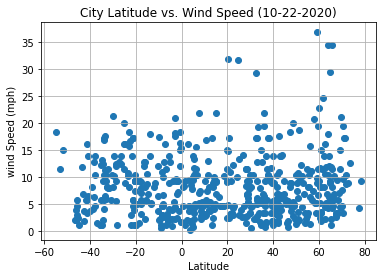

This plot does not show a relationship pattern between latitude and cloudiness


In [15]:
#labeling
x_lab = 'Latitude'
y_lab = 'wind Speed (mph)'
title = f'City Latitude vs. Wind Speed ({time.strftime("%m-%d-%Y")})'

#saving
savename = 'fig 4 - Latitude_V_Wind_speed'

#function
plotting_data(weather_df['Lat'], weather_df['Wind Speed'], x_lab, y_lab, title, savename)

print('This plot does not show a relationship pattern between latitude and cloudiness')

## Linear Regression

In [16]:
#finding Northern and southern cities based on Latitude
northern_cities = weather_df.loc[weather_df['Lat'] > 0.00]
southern_cities = weather_df.loc[weather_df['Lat'] < 0.00]

#resetting their indexes
northern_cities.reset_index(inplace = True)
southern_cities.reset_index(inplace = True)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-Value is: -0.87689925029229


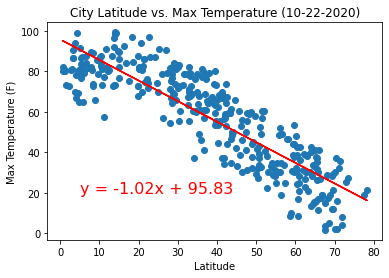

Linear Regression = Negative Correlation
As you move away from the Equator (Lat:0), the Temperature drops in the northern hemisphere cities.


In [17]:
#Scatterplot
plt.scatter(northern_cities['Lat'], northern_cities['Max Temp'], marker = "o")

#labeling
plt.title(f'City Latitude vs. Max Temperature ({time.strftime("%m-%d-%Y")})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

#linear Regression
(slope, intercept, rvalue, pvalue, std_err) = linregress(northern_cities['Lat'], northern_cities['Max Temp'])

#line formula --> y=mx+b
reg_val = northern_cities['Lat'] * slope + intercept
lineeq = f'y = {round(slope,2)}x + {round(intercept,2)}'

#line plotting
plt.plot(northern_cities['Lat'], reg_val, color='r')
plt.annotate(lineeq, (5,20), color='red', fontsize=16)

#exporting plot as png
plt.savefig("output_data/weatherpy/fig 5 - LinearREG-Lat_V_Temp - North.png")

#printing
print(f'The r-Value is: {rvalue}')
plt.show()

#conclusions
print('Linear Regression = Negative Correlation')
print('As you move away from the Equator (Lat:0), the Temperature drops in the northern hemisphere cities.')

# Using a function to plot remaining plots

In [18]:
#using a function to plot scatter plots with linear regression

def line_reg_plotting(x_axis, y_axis, x_lab, y_lab, title, savename,linepos):
    
    #linear Regression
    (slope, intercept, rvalue, pvalue, std_err) = linregress(x_axis, y_axis)
    
    #line formula --> y=mx+b
    reg_val = x_axis * slope + intercept
    lineeq = f'y = {round(slope,2)}x + {round(intercept,2)}'
    
    #scatterplot and lineplot
    plt.scatter(x_axis, y_axis, marker = "o")
    plt.plot(x_axis, reg_val, color='r')
    plt.annotate(lineeq, linepos, color='red',fontsize = 16)
    
    
    #labeling
    plt.title(title)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    
    #exporting plot as png
    plt.savefig(f"output_data/weatherpy/{savename}.png")
    
    #printing
    print(f'The r-Value is: {rvalue}')
    plt.show()  
    


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-Value is: 0.7014887271931793


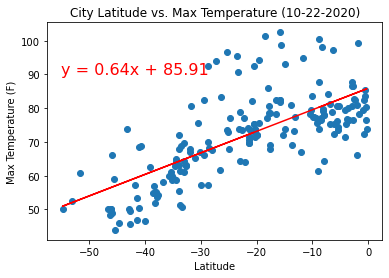

Linear Regression = Positive Correlation
As you move towards the Equator (Lat:0), the temperature rises in the southern hemisphere cities.


In [19]:
#labeling
x_lab = 'Latitude'
y_lab = 'Max Temperature (F)'
title = f'City Latitude vs. Max Temperature ({time.strftime("%m-%d-%Y")})'

#saving
savename = 'fig 6 - LinearREG-Lat_V_Temp - South.png'

#line equation position
linepos = (-55,90)

#function
line_reg_plotting(southern_cities['Lat'], southern_cities['Max Temp'], x_lab, y_lab, title, savename,linepos)  

#conclusions
print('Linear Regression = Positive Correlation')
print('As you move towards the Equator (Lat:0), the temperature rises in the southern hemisphere cities.')


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-Value is: 0.3704836605162656


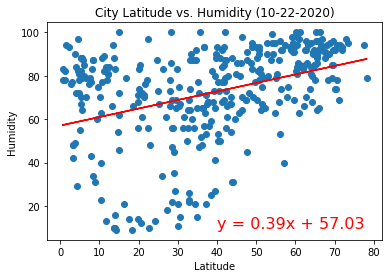

Linear Regression = slightly positive Correlation
No real correlation relationship can be inferred from this dataset


In [20]:
#labeling
x_lab = 'Latitude'
y_lab = 'Humidity'
title = f'City Latitude vs. Humidity ({time.strftime("%m-%d-%Y")})'

#saving
savename = 'fig 7 - LinearREG-Lat_V_Humid - North.png'

#line equation position
linepos = (40,10)

#labeling #saving #line equation position #function
line_reg_plotting(northern_cities['Lat'], northern_cities['Humidity'], x_lab, y_lab, title, savename, linepos)  
    
#conclusions
print('Linear Regression = slightly positive Correlation')
print('No real correlation relationship can be inferred from this dataset')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-Value is: -0.05518264527779133


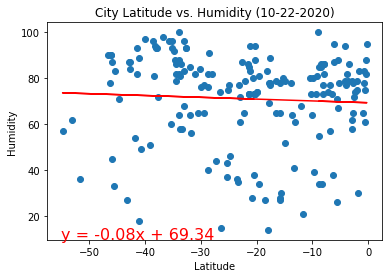

Linear Regression = slightly negative Correlation
No real correlation relationship can be inferred from this dataset


In [21]:
#labeling
x_lab = 'Latitude'
y_lab = 'Humidity'
title = f'City Latitude vs. Humidity ({time.strftime("%m-%d-%Y")})'

#saving
savename = 'fig 8 - LinearREG-Lat_V_Humid - South.png'

#line equation position
linepos = (-55,10)

#function
line_reg_plotting(southern_cities['Lat'], southern_cities['Humidity'], x_lab, y_lab, title, savename, linepos)  

#conclusions
print('Linear Regression = slightly negative Correlation')
print('No real correlation relationship can be inferred from this dataset')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-Value is: 0.14809285036152106


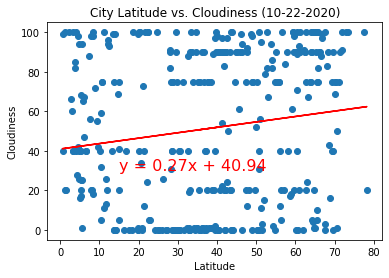

Linear Regression = slightly positive Correlation
No real correlation relationship can be inferred from this dataset


In [22]:
#labeling
x_lab = 'Latitude'
y_lab = 'Cloudiness'
title = f'City Latitude vs. Cloudiness ({time.strftime("%m-%d-%Y")})'

#saving
savename = 'fig 9 - LinearREG-Lat_V_Cloud - North.png'

#line equation position
linepos = (15,30)

#function
line_reg_plotting(northern_cities['Lat'], northern_cities['Cloudiness'], x_lab, y_lab, title, savename, linepos)  

#conclusions
print('Linear Regression = slightly positive Correlation')
print('No real correlation relationship can be inferred from this dataset')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-Value is: 0.037270180249643


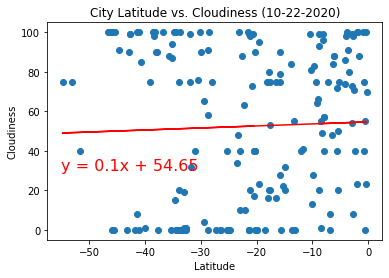

Linear Regression = slightly positive Correlation
No real correlation relationship can be inferred from this dataset


In [23]:
#labeling
x_lab = 'Latitude'
y_lab = 'Cloudiness'
title = f'City Latitude vs. Cloudiness ({time.strftime("%m-%d-%Y")})'

#saving
savename = 'fig 10 - LinearREG-Lat_V_Cloud - South.png'

#line equation position
linepos = (-55,30)

#function
line_reg_plotting(southern_cities['Lat'], southern_cities['Cloudiness'], x_lab, y_lab, title, savename, linepos)  

#conclusions
print('Linear Regression = slightly positive Correlation')
print('No real correlation relationship can be inferred from this dataset')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-Value is: 0.11650596565215941


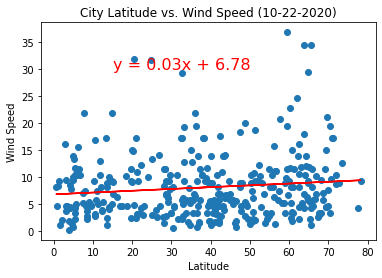

Linear Regression = slightly positive Correlation
No real correlation relationship can be inferred from this dataset


In [24]:
#labeling
x_lab = 'Latitude'
y_lab = 'Wind Speed'
title = f'City Latitude vs. Wind Speed ({time.strftime("%m-%d-%Y")})'

#saving
savename = 'fig 11 - LinearREG-Lat_V_Wind - North.png'

#line equation position
linepos = (15,30)

#function
line_reg_plotting(northern_cities['Lat'], northern_cities['Wind Speed'], x_lab, y_lab, title, savename, linepos)  

#conclusions
print('Linear Regression = slightly positive Correlation')
print('No real correlation relationship can be inferred from this dataset')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-Value is: -0.020539580084899034


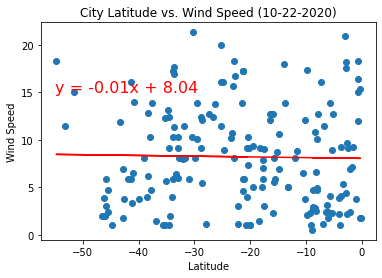

Linear Regression = slightly negative Correlation
No real correlation relationship can be inferred from this dataset


In [25]:
#labeling
x_lab = 'Latitude'
y_lab = 'Wind Speed'
title = f'City Latitude vs. Wind Speed ({time.strftime("%m-%d-%Y")})'

#saving
savename = 'fig 12 - LinearREG-Lat_V_Wind - North.png'

#line equation position
linepos = (-55,15)

#function
line_reg_plotting(southern_cities['Lat'], southern_cities['Wind Speed'], x_lab, y_lab, title, savename, linepos)  

#conclusions
print('Linear Regression = slightly negative Correlation')
print('No real correlation relationship can be inferred from this dataset')

#### Oservations:

1. As you move away from the equator (Lat:0), temperature drops

2. Wind Speeds increase slightly as you move away from the equator

3. Almost little to no correlation between Latitude and Humidity/Cloudiness